# Quicksort


Prueba en permutaciones de tamaño 16, en 10000000 de intentos. El tiempo mostrado es en segundos:

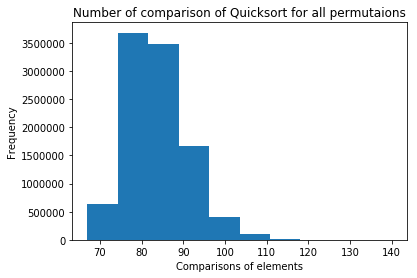

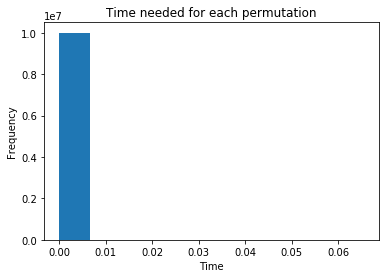

tamaño: 16
intentos: 10000000
media de comparaciones: 83.6672941
media de tiempo: 6.092662241458893e-05
desviación comparaciones: 7.093957817504199
desviación tiempos: 0.0002191114829437394
min comparasiones: 67
min tiempo: 0.0
max: 140
max tiempos: 0.06552696228027344
TIEMPO TOTAL: 618.5546770095825


In [4]:
import random
import statistics
import matplotlib.pyplot as plt
from time import time

def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   times.append(comp[0])

def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart

def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
   
    tlist =[]
    tiempos= []
    in_time = time()
    for p in range(1,runs+1):
          y = list(x)
          start_time = time()
          randomquicksort(y,tlist)
          elapsed_time = time() - start_time
          tiempos.append(elapsed_time)
          
    totaltime = time() - in_time
    
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()

    plt.hist(tiempos)
    plt.title("Time needed for each permutation")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()
    
    print("tamaño:",n)
    print("intentos:",runs)
    print("media de comparaciones:",statistics.mean(tlist))
    print("media de tiempo:",statistics.mean(tiempos))
    print("desviación comparaciones:",statistics.stdev(tlist))
    print("desviación tiempos:",statistics.stdev(tiempos))
    print("min comparasiones:",min(tlist))
    print("min tiempo:",min(tiempos))
    print("max:",max(tlist))
    print("max tiempos:",max(tiempos))
    
    print("TIEMPO TOTAL:", totaltime)

randomquicksorttimedistrib(16,10000000)


El tiempo total fue de 618.55 segundos, aproximadamente, y en minutos esto equivale a 10.31 minutos. Es decir, en 5 horas debería ser posible repetir esta cantidad de intentos 29 veces.

Se intentó correr el programa por 5 horas, pero cuando se estaba por llegar a la quinta hora el proceso se congelaba, y era necesario reiniciar el computador. Tal vez por saturación de la memoria.